# How the weather in Hong Kong differs from the weather in Paris?
## In a few descriptive statistics...

## (1) Temperature profile

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

In [3]:
treated_data_rep = r'../0_Data/wrangled/' 
PARIS_AGG = pd.read_pickle(treated_data_rep+"PARIS_AGG.pkl")
HKDaily_AGG = pd.read_pickle(treated_data_rep+"HKDaily_AGG.pkl")

In [4]:
Daily_Weather_Comp= HKDaily_AGG.join(PARIS_AGG, on = "Date", rsuffix = "_PAR")
Daily_Weather_Comp['month'] = Daily_Weather_Comp.index.month


In [5]:
print(Daily_Weather_Comp.loc[Daily_Weather_Comp['TX'].isna()].shape)
print(Daily_Weather_Comp.loc[Daily_Weather_Comp['TX_PAR'].isna()].shape)
Daily_Weather_Comp.loc[Daily_Weather_Comp['TX_PAR'].isna()]

(0, 7)
(21549, 7)


,TX,RR,UM,RR_PAR,TX_PAR,UM_PAR,month
Date,,,,,,,
1884-01-01,15.3,NaN,NaN,NaN,NaN,NaN,1
1884-01-02,17.1,NaN,NaN,NaN,NaN,NaN,1
1884-01-03,19.6,NaN,NaN,NaN,NaN,NaN,1
1884-01-04,23.2,NaN,NaN,NaN,NaN,NaN,1
1884-01-05,19.4,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
1949-12-27,20.7,0.0,68.0,NaN,NaN,NaN,12
1949-12-28,19.6,0.0,66.0,NaN,NaN,NaN,12
1949-12-29,22.6,NaN,68.0,NaN,NaN,NaN,12


Since the weather data for Paris stards only from 1950, let's filter the period before 1950 to conserve only the commonly observed dataset. For Temperature dataset of Paris, the dataset begins in 1950 and there is no more missing values after on.

In [6]:
Daily_Weather_Comp_TX = Daily_Weather_Comp.loc[Daily_Weather_Comp['TX_PAR'].isna()]
Daily_Weather_Comp_TX['annee'] = Daily_Weather_Comp_TX.index.year
#Daily_Weather_Comp_TX.reset_index().groupby('annee').count()

/var/folders/6b/16jtbq3j6w17kqv1h2k9_zt80000gn/T/ipykernel_48174/3582607573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_Weather_Comp_TX['annee'] = Daily_Weather_Comp_TX.index.year


In [7]:
Daily_Weather_Comp_TX = Daily_Weather_Comp.loc[Daily_Weather_Comp.index>'1950-01-01']

In [8]:
table_graph1 = Daily_Weather_Comp_TX[['month', 'TX','TX_PAR']].reset_index(drop = True)
table_graph1 = table_graph1.melt(id_vars = "month")

/var/folders/6b/16jtbq3j6w17kqv1h2k9_zt80000gn/T/ipykernel_48174/1175993094.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.violinplot(data=table_graph1, x="month", y="value", hue="variable",


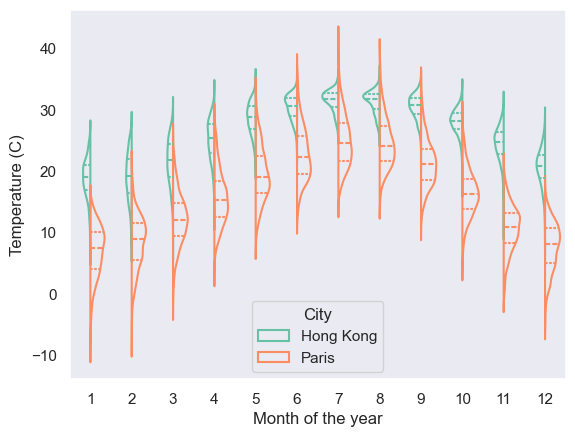

In [9]:
# Violin Plot of Temperature
g = sns.violinplot(data=table_graph1, x="month", y="value", hue="variable",
               split=True, inner="quart", fill=False,
               palette=sns.color_palette("Set2"))

g.set_ylabel("Temperature (C)")
g.set_xlabel("Month of the year")

# Legend Modifications:

L=plt.legend(loc='lower center', title='City')
L.get_texts()[0].set_text('Hong Kong')
L.get_texts()[1].set_text('Paris')

Temperature variation for two cities seems to move in the same direction along the year - a diminution of temperature from October to December and back to a progressive increase during the period from January to July. 

Temperature in Hong Kong varies much less than in Paris, within the month (See the temperature standard deviation per month in the table below) and within the year (5.4 vs. 7.6 of standard deviation). The distance between the minimal and maximal values show that too (18.0 for Paris while 12.6 for Hong Kong).

It is an interesting point that, in the winter time, the temperature varies more than in the summer time in Hong Kong, while it is the opposite for Paris. Which means that, in Hong Kong, it is hot every day in the summer without much variation between different days, and it is less hot but with much more variation in the winter - so it can still be hot occasionally. In Paris, in the summer time it is more variable in the summer time - there is more chance that the hot weather comes and goes for some days in summer. While, in the winter time as well, the standrad deviation of Temperature of Paris is higher (about 3.8) than the one in the winter in Hong Kong (and in particular the one of February, which is the maximal standard deviation for Hong Kong (3.77)). 

Therefore, in terms of temperature, Summer in Hong Kong will be more painful with its restless hot weather, and the winter will be more enjoyable since it is more probable to have some extraordinary sunny and warm day for the winter.

In [10]:
temperature_avg = Daily_Weather_Comp[['month','TX', 'TX_PAR']].groupby('month').agg(func=["mean", "var", "std"])
print(temperature_avg.reset_index()[[('TX', 'mean')]].max()-temperature_avg.reset_index()[[('TX', 'mean')]].min())
print(temperature_avg.reset_index()[[('TX_PAR', 'mean')]].max()-temperature_avg.reset_index()[[('TX_PAR', 'mean')]].min())
print(Daily_Weather_Comp[['TX', 'TX_PAR']].agg(func=["mean", "var", "std"]))
temperature_avg

TX  mean    12.624416
dtype: object
TX_PAR  mean    17.955518
dtype: float64
             TX     TX_PAR
mean  25.399813  15.959487
var   29.326604  58.331795
std    5.415404   7.637525


TX                          TX_PAR                     
            mean        var       std       mean        var       std
month                                                                
1      18.485476   9.853673  3.139056   6.974156  17.429718  4.174891
2      18.398781  14.206765  3.769186   8.449039  18.867800  4.343708
3      20.815414  13.475079  3.670842  12.195983  18.449779  4.295321
4      24.536914  11.247149  3.353677  15.631511  19.703428  4.438854
5      28.168006   6.927624  2.632038  19.496937  19.697061  4.438137
6      30.061886   3.859614  1.964590  22.766983  19.049913  4.364621
7      31.023197   2.995222  1.730671  24.929674  18.409032  4.290575
8      30.853032   3.292301  1.814470  24.633177  17.004355  4.123634
9      30.114573   3.702311  1.924139  21.342070  15.102672  3.886216
10       27.6434   4.277624  2.068242  16.433811  14.968935  3.868971
11     24.095999   6.811258  2.609839  10.718230  13.843830  3.720730
12     20.310548   8.190449  2.861896   7.700655  15.418157  3.926596

## (2) Humidity profile

In [11]:
# For Humidity:
# Scatter plot with group color by month 
# Pair by day of the year

Daily_Weather_Comp_UM = Daily_Weather_Comp.loc[Daily_Weather_Comp['UM_PAR'].isna()==False]
Daily_Weather_Comp_UM['annee'] = Daily_Weather_Comp_UM.index.year
cmpt_UM_PARIS = Daily_Weather_Comp_UM.reset_index().groupby('annee').count()

/var/folders/6b/16jtbq3j6w17kqv1h2k9_zt80000gn/T/ipykernel_48174/3754899179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_Weather_Comp_UM['annee'] = Daily_Weather_Comp_UM.index.year


In [12]:
cmpt_UM_PARIS.loc[cmpt_UM_PARIS['UM_PAR']<360]

,Date,TX,RR,UM,RR_PAR,TX_PAR,UM_PAR,month
annee,,,,,,,,
1982,350,350,279,350,350,350,350,350
1983,355,355,305,355,355,355,355,355
1984,352,352,305,352,352,352,352,352
1985,332,332,321,332,332,332,332,332
1986,337,337,337,337,337,337,337,337
2025,59,59,59,59,59,59,59,59


In contrary to Temperature data, Humidity data for Paris starts only in 1958, and there are few missing values after on for few years in the early 80's. 

In [13]:
Daily_Weather_Comp_UM = Daily_Weather_Comp.loc[Daily_Weather_Comp.index>='1958-01-01']

In [14]:
table_graph1 = Daily_Weather_Comp_UM[['month', 'UM','UM_PAR']].reset_index(drop = True)
table_graph1.columns = ['month', 'Hong Kong', 'Paris']
table_graph1 = table_graph1.melt(id_vars = "month")
table_graph1

,month,variable,value
0,1,Hong Kong,73.0
1,1,Hong Kong,74.0
2,1,Hong Kong,58.0
3,1,Hong Kong,37.0
4,1,Hong Kong,41.0
...,...,...,...
49057,2,Paris,81.0
49058,2,Paris,89.5
49059,2,Paris,85.0
49060,2,Paris,76.5


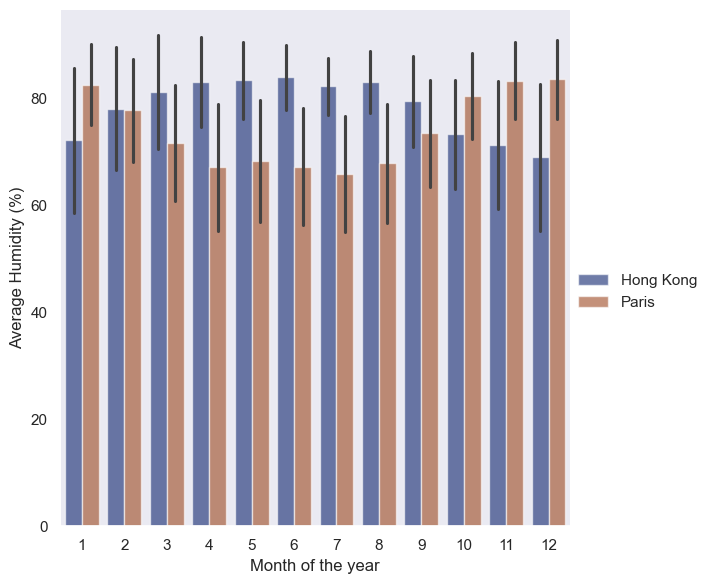

In [15]:
sns.set_theme(style="dark")
g = sns.catplot(
    data=table_graph1, kind="bar",
    x="month", y="value", hue="variable",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Month of the year", "Average Humidity (%)")
g.legend.set_title("")

It is very interesting that the humidity movement along the year of twe cities is quite symmetric, in the opposite direction. Another difference is the standard deviation in the summer time. In Hong Kong, during the summer time, the weather is humid with less variation. It is whether uncertain that the weather is humid or dry during the winter time of Hong Kong, since the variance is much higher for that period. On the other hand, Paris humidity shows much more of standard deviation all along the year. 

## (3) Rainfall profile

How about the rainfall data of these two cities? Does it rain much more in France? Or in Hong Kong? Without any hint, I might have chosen Hong Kong to rain more than in France, since the weather is hotter and more humid in Hong Kong. 

The rainfall data for Paris is more complete than the humidity data.

In [16]:
RRPARIS_data = Daily_Weather_Comp.loc[Daily_Weather_Comp['RR_PAR'].isna()==False]
RRPARIS_data['annee'] = RRPARIS_data.index.year
cmpt_RRPARIS_data = RRPARIS_data.groupby('annee').count()
cmpt_RRPARIS_data.loc[cmpt_RRPARIS_data['RR_PAR']<350]

/var/folders/6b/16jtbq3j6w17kqv1h2k9_zt80000gn/T/ipykernel_48174/1660204733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RRPARIS_data['annee'] = RRPARIS_data.index.year


,TX,RR,UM,RR_PAR,TX_PAR,UM_PAR,month
annee,,,,,,,
2025,59,59,59,59,59,59,59


In [17]:
total_RF = RRPARIS_data[['annee', 'month', 'RR', 'RR_PAR']].groupby(['annee', 'month']).sum()
total_RF.reset_index(inplace = True)
del total_RF['annee']

In [24]:
total_RF.columns = ['month','Hong Kong', 'Paris']
total_RF = total_RF.melt(id_vars = 'month')

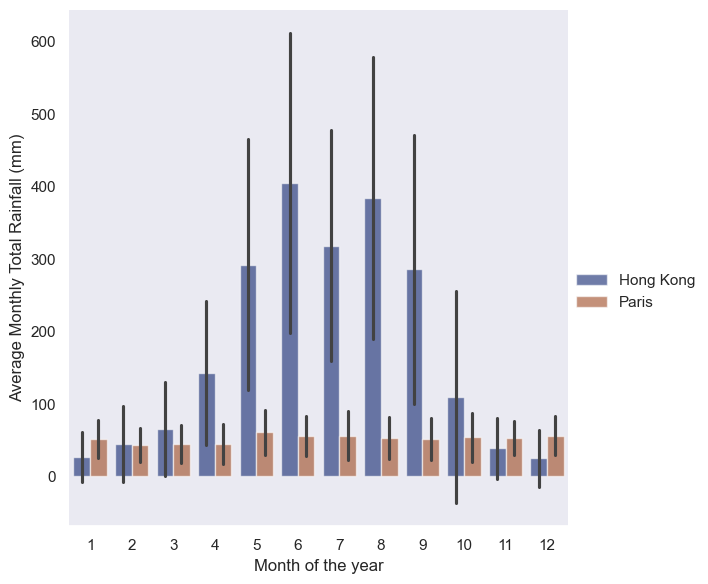

In [25]:
sns.set_theme(style="dark")
g = sns.catplot(
    data=total_RF, kind="bar",
    x="month", y="value", hue="variable",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Month of the year", "Average Monthly Total Rainfall (mm)")
g.legend.set_title("")

When we look at the monthly total rainfall data, it is very volatile in Hong Kong, especially during the summer time, while it rains almost always the same amount of rainfalls in Paris.